In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
import matplotlib as mpl
import DataAnalysis as da
import numpy as np
import re

The number of mention tweets is 5908
The number of retweets is 30402
The number of reply tweets is 1542
The number of general tweets is 8659
The number of total number of tweets is 46511
The number of different users is 33247
The average number of general tweets per user is: 0.2604445513880952
The average number of mentions tweets per user is: 0.1777002436310043
The average number of retweets per user is: 0.9144283694769453
The average number of replies per user is: 0.04638012452251331
The average number of followers per user is: 10830.035522001985
The average number of friends per user is: 10830.035522001985
5 most popular hashtags with their respective occurances are [('Philae', 18260), ('ESA', 10417), ('esa', 3053), ('philae', 1583), ('esaoperations', 985)]
5 contextually different most popular hashtags with their respective occurances are [('philae', 19843), ('esa', 13477), ('esaoperations', 988), ('livestream', 904), ('observingspace', 453)]
5 most popular apps to send tweets are 

# Data Visualisation Justifications

Data visualisation is the end of the pipeline where we start to make sense of what the data actually tells us. In our graphs, we paid attention to have information that is presented accurately. Also, we made sure our data would present the information clearly. For example, in certain occasions the data had a big range. Therefore, we adjusted the y axis to use logarithmic scale. 

Moreover, we have also utilized dynamic plots where the user can interact with the visualistion and manipulate axes in a way that would be desired. In these plots, one of our goal was to present data in different ways to further aid understanding of that information. For example, rather than just using a number to represent the frequency, we made the data point bigger or in different colours. 

In [2]:
pd.set_option('max_colwidth', 400)

df = pd.read_csv('./data/CleanedCometLanding.csv')

dfHashtags = pd.read_csv('./data/Hashtags.csv', names = ['Hashtags'])
dfHashtags.drop(index=0)

dfHashtagsCI = pd.read_csv('./data/HashtagsCI.csv', names = ['Hashtags'])
dfHashtagsCI.drop(index=0)

dfHours = pd.read_csv('./data/Hours.csv' , names = ['Hour of the day in the 24 Hour Format', 'Frequency Of Tweets In Numbers'])

dfDays = pd.read_csv('./data/Days.csv' , names = ['Days', 'Frequency'])

dfLanguages = pd.read_csv('./data/Languages.csv' , names = ['Languages', 'Frequency'])

dfDates = pd.read_csv('./data/Date.csv' , names = ['Dates', 'Frequency'])

dfPopularApplications = pd.read_csv('./data/applications.csv' , names = ['Applications Used to Send Tweets', 'Frequency Of Applications Used In Numbers'])    

In [3]:
''' This function plots a pie chart for the structure of the dataset (tweets/retweets/replies)'''

def visualiseStruct(df):
    tweetStructs = ['General tweets', 'Mentions', 'Retweets', 'Replies']
    proportions = []
    myExplode = [0, 0, 0.2, 0]

    proportions.append(da.getNumberOfGeneralTweets(df))
    proportions.append(da.getNumberOfMentionTweets(df))
    proportions.append(da.getNumberOfRetweets(df))
    proportions.append(da.getNumberOfReplies(df))
    
    fig1, ax1 = plt.subplots()
    ax1.pie(proportions, labels = tweetStructs, explode = myExplode, autopct='%1.1f%%', shadow = True)
    ax1.set_title('Structure Of The Dataset')
    plt.savefig('./images/struct.png')
    
    plt.show()

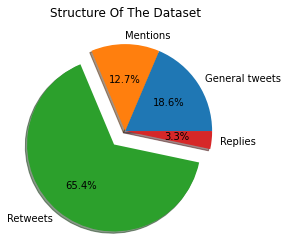

In [4]:
 visualiseStruct(df)

In [5]:
#https://www.geeksforgeeks.org/bar-plot-in-matplotlib/
def visualiseLanguageDistribution(dfLanguages):
    
    sortedDataFrame= dfLanguages.sort_values('Frequency')
    data = sortedDataFrame.set_index('Languages')['Frequency'].to_dict()
    
    Languages = list(data.keys())
    frequency = list(data.values())
        
    
    fig = plt.figure(figsize = (10, 5))
 
    # creating the bar plot
    plt.bar(Languages, frequency, color ='maroon',
        width = 0.4)
    

    plt.xlabel("Different Languages of the Users")
    plt.ylabel("Frequency Of Tweets In Numbers")
    plt.title("Distribution Of User Language During Rosetta’s Philae Lander")
    plt.savefig('./images/languageDistribution.png')
    
    plt.show()

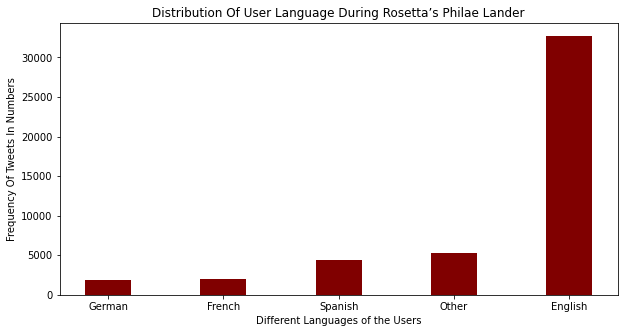

In [6]:
visualiseLanguageDistribution(dfLanguages)

In [7]:
''' This function plots the word cloud of all hashtags in the dataset '''
#https://www.geeksforgeeks.org/generating-word-cloud-python
#https://www.analyticsvidhya.com/blog/2021/05/how-to-build-word-cloud-in-python/

def createWordCloud(dfHashtags):
    df = dfHashtags['Hashtags'].value_counts()
    
    stopwords = set(STOPWORDS)
    
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color='white',
                          stopwords= stopwords,
                          min_font_size = 10).generate_from_frequencies(df)

    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.savefig('./images/wordCloud.png')
    
    plt.show()
    

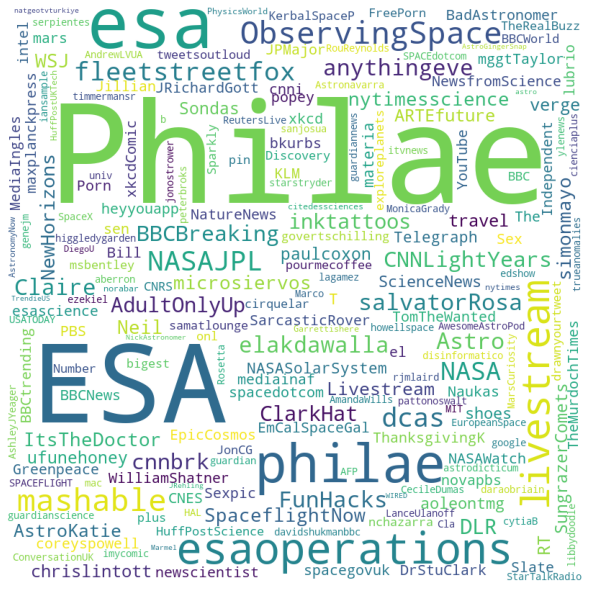

In [8]:
createWordCloud(dfHashtags)

In [9]:
''' This function plots the word cloud of all hashtags in the dataset '''
#https://www.geeksforgeeks.org/generating-word-cloud-python
#https://www.analyticsvidhya.com/blog/2021/05/how-to-build-word-cloud-in-python/

def createWordCloudCI(dfHashtagsCI):
    df = dfHashtagsCI['Hashtags'].value_counts()
    
    stopwords = set(STOPWORDS)
    
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color='white',
                          stopwords= stopwords,
                          min_font_size = 10).generate_from_frequencies(df)

    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.savefig('./images/wordCloudCI.png')
    
    plt.show()
    

In [10]:
createWordCloudCI(dfHashtagsCI)

In [11]:
#https://www.geeksforgeeks.org/bar-plot-in-matplotlib/
def plotTweetsPerDay(dfDays):
    
    sortedDataFrame= dfDays.sort_values('Frequency')
    data = sortedDataFrame.set_index('Days')['Frequency'].to_dict()
    
    days = list(data.keys())
    frequency = list(data.values())
        
    
    fig = plt.figure(figsize = (10, 5))
 
    # creating the bar plot
    plt.bar(days, frequency, color ='maroon',
        width = 0.4)
    
    plt.yscale('log')
    plt.xlabel("Days Of The Week")
    plt.ylabel("Frequency Of Tweets In Logarithmic Scale (Base 10)")
    plt.title("Tweet Frequency During Rosetta’s Philae Lander On Different Days Of The Week")
    plt.savefig('./images/tweetsPerDay.png')
    
    plt.show()

In [12]:
plotTweetsPerDay(dfDays)

In [13]:
#https://www.geeksforgeeks.org/bar-plot-in-matplotlib/
def plotTweetsPerDate(dfDates):
    
    sortedDataFrame= dfDates.sort_values('Frequency')
    data = sortedDataFrame.set_index('Dates')['Frequency'].to_dict()

    dates = list(data.keys())
    frequency = list(data.values())
    filtered  = []
    
    for x in dates:
        x = str(x).replace(',' , '/')
        x = str(x).replace("'" , '')
        filtered.append(x)
    
    fig = plt.figure(figsize = (10, 5))
 
    # creating the bar plot
    plt.bar(filtered, frequency, color ='maroon',
        width = 0.4)
    
    plt.yscale('log')
    plt.xlabel("Dates Of The Year")
    plt.ylabel("Frequency Of Tweets In Logarithmic Scale (Base 10)")
    plt.title("Tweet Frequency During Rosetta’s Philae Lander On Different Dates Of The Year")
    plt.savefig('./images/tweetsPerDate.png')
    
    plt.show()
   

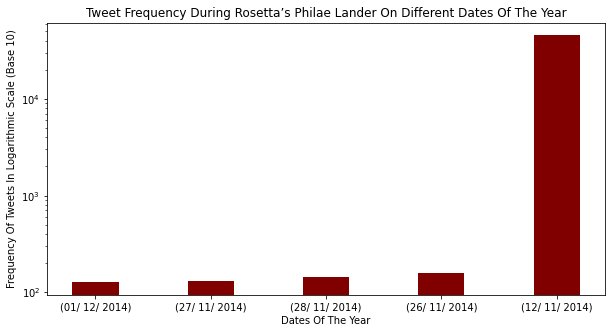

In [14]:
plotTweetsPerDate(dfDates)

In [15]:
#https://www.geeksforgeeks.org/matplotlib-pyplot-scatter-in-python/
def plotTweetsPerHours(dfHours):
    
    sortedDF= dfHours.sort_values('Hour of the day in the 24 Hour Format')
    
    fig = px.scatter( sortedDF, 
                     x = 'Hour of the day in the 24 Hour Format',
                     y = 'Frequency Of Tweets In Numbers',
                     size="Frequency Of Tweets In Numbers",
                     animation_frame="Hour of the day in the 24 Hour Format",
                     range_x=[0,24],
                     range_y=[5000,10000])
 
    fig.update_traces(marker=dict(size=12, line=dict(width=2,color='Red')),
                      selector=dict(mode='markers'))
    
    fig.write_image("./images/tweetsPerHours.png")
    fig.show()
    

In [16]:
plotTweetsPerHours(dfHours)

In [17]:
#https://www.geeksforgeeks.org/matplotlib-pyplot-scatter-in-python/
def plotPopularApplications(dfPopularApplications):
    
    sortedDF= dfPopularApplications.sort_values('Frequency Of Applications Used In Numbers')
    
    fig = px.scatter( sortedDF, 
                     x = 'Applications Used to Send Tweets',
                     y = 'Frequency Of Applications Used In Numbers',
                     size="Frequency Of Applications Used In Numbers",
                     color= 'Frequency Of Applications Used In Numbers')
 
    fig.update_traces(marker=dict(size=12, line=dict(width=2,color='Red')),
                      selector=dict(mode='markers'))
    
    fig.write_image("./images/populatApplications.png")
    
    fig.show()
    

In [18]:
plotPopularApplications(dfPopularApplications)

In [19]:
def plotAllCharts():
    visualiseStruct(df)
    createWordCloud(dfHashtags)
    plotTweetsPerDay(dfDays)
    plotTweetsPerDate(dfDates)
    plotTweetsPerHours(dfHours)
    plotPopularApplications(dfPopularApplications)
    visualiseLanguageDistribution(dfLanguages)

In [20]:
#def main():

    #pd.set_option('max_colwidth', 400)
    #df = pd.read_csv('./data/CleanedCometLanding.csv')

    #dfHashtags = pd.read_csv('./data/Hashtags.csv', names = ['Hashtags'])
    #dfHashtags.drop(index=0)

    #dfHashtagsCI = pd.read_csv('./data/HashtagsCI.csv', names = ['Hashtags'])
    #dfHashtagsCI.drop(index=0)

    #dfHours = pd.read_csv('./data/Hours.csv' , names = ['Hour of the day in the 24 Hour Format', 'Frequency Of Tweets In Numbers'])

    #dfDays = pd.read_csv('./data/Days.csv' , names = ['Days', 'Frequency'])

    #dfDates = pd.read_csv('./data/Date.csv' , names = ['Dates', 'Frequency'])
    
    #dfLanguages = pd.read_csv('./data/Languages.csv' , names = ['Languages', 'Frequency'])

    #dfPopularApplications = pd.read_csv('./data/applications.csv' , names = ['Applications Used to Send Tweets', 'Frequency Of Applications Used In Numbers'])    
    #plotAllCharts()

#if __name__ == "__main__":
    #main()
